# Machine Learning Laboratory [AI29201]

# End Semester Lab Examination

<font color='gold'>Import Libraries </font>



In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
np.random.seed(42)

### <font color='gold'> Task - 1 [Marks 1] </font>:
Load the human activity recognition dataset from the provided ZIP file.

In [3]:
X_train = pd.read_csv("X_train.txt", delim_whitespace=True,header= None)
y_train = pd.read_csv("y_train.txt", delim_whitespace=True,header=None)
X_test = pd.read_csv("X_test.txt", delim_whitespace=True,header= None)
y_test = pd.read_csv("y_test.txt", delim_whitespace=True,header= None)


In [4]:
display(X_train.head())

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


### <font color='gold'> Task - 2 [Marks 1] </font>:
Check the dataset for missing feature values and duplicate entries.

Standardize the training and test sets.

In [5]:
data = pd.concat([X_train, y_train], axis=1)

# Check for missing values
print(data.isnull().sum().sum())

0


In [6]:
print(data.duplicated().sum())

0


In [7]:
# So we can conclude that there are no duplicates nor there are any missing values in the test dataset
print(X_test.isnull().sum().sum())

0


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

### <font color='gold'> Task - 3 [Marks 2] </font>:
Perform activity classification on the dataset using SVM from scikit-learn. Use RBF kernel and default parameters.  

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Initialize a linear SVM
svm_linear = SVC(kernel='rbf', random_state=42)

# Train the model
svm_linear.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_linear.predict(X_test)



/home/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### <font color='gold'> Task - 4 [Marks 1] </font>:

Show the classification report of the SVM classifier on this dataset and report the overall accuracy. You can use sklearn functions for accuracy score and classification report.

In [10]:
# Evaluate the classifier
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.97      0.97       496
           2       0.93      0.97      0.95       471
           3       0.98      0.92      0.95       420
           4       0.94      0.90      0.92       491
           5       0.92      0.95      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



### <font color='gold'> Task - 5 [Marks 4] </font>:
Implement LDA from scratch to project a data point to a new features space having D dimensions, where d varies from

1 to minimum(n, C-1), where n is the number of features in the original feature space, and C is the number of classes.  



In [11]:

class LDAFromScratch:
    def __init__(self, n_components):
        self.n_components = n_components
        self.scalings_ = None

    def fit(self, X, y):
        # Compute overall mean
        mean_overall = np.mean(X, axis=0)
        classes = np.unique(y)
        S_w = np.zeros((X.shape[1], X.shape[1]))  # Within-class scatter matrix
        S_b = np.zeros((X.shape[1], X.shape[1]))  # between-class scatter matrix

        for c in classes:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # Within-class scatter
            S_w += (X_c - mean_c).T.dot(X_c - mean_c)
            
            # Between-class scatter
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(X.shape[1], 1)
            S_b += n_c * (mean_diff).dot(mean_diff.T)
        delta = 1e-6*(np.eye(X.shape[1],X.shape[1]))
        
        # Eigen decomposition of the matrix S_W^-1 * S_B
        eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_w+delta).dot(S_b))

        # Sort the eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigvals)[::-1]
        eigvecs_sorted = eigvecs[:, sorted_indices]

        # Select the top n_components
        self.scaling = eigvecs_sorted[:, :self.n_components]
        return self.scaling


    def transform(self, X):
        return X.dot(self.scaling)

#

### <font color='gold'> Task - 6 [Marks 2] </font>:
Project the data to the new d-dimensional feature space using the projection matrix found by your LDA implementation.  

In [12]:
c = y_train.drop_duplicates().shape[0] # number of unique classes 

In [13]:
print(c)

6


In [14]:
X_scaled = X_train

In [15]:
#Initialize and fit LDA
lda_scratch = LDAFromScratch(n_components=min(2,c-1))
lda_scratch.fit(X_scaled, y_train.values.reshape(-1))
X_lda_scratch = lda_scratch.transform(X_scaled)


In [16]:
X_lda_scratch.shape

(7352, 2)

### <font color='gold'> Task - 7 [Marks 2] </font>:
Train the same SVM classifier from step 3 (RBF kernel and default parameters) to perform classification using the newly projected d-dimensional data points.    

In [17]:
accuracies = [0]

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
X_test_scaled = X_test

In [20]:

for d in range(1,min(X_train.shape[0],c-1)+1):
    lda_scratch = LDAFromScratch(n_components=d)
    lda_scratch.fit(X_scaled, y_train.values.reshape(-1))
    X_lda_scratch = lda_scratch.transform(X_scaled).real
    X_test_lda_scratch = lda_scratch.transform(X_test_scaled).real
    # Initialize a linear SVM
    svm_linear = SVC(kernel='rbf', random_state=42)
    # Train the model
    svm_linear.fit(X_lda_scratch, y_train)
    # Predictions on the test set
    y_pred = svm_linear.predict(X_test_lda_scratch.real)
    acc = accuracy_score(y_test,y_pred)
    accuracies.append(acc)


/home/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

### <font color='gold'> Task - 8 [Marks 1] </font>:
Plot the overall classification accuracy as a function of d.  

In [21]:
accuracies = pd.DataFrame(accuracies)

/home/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

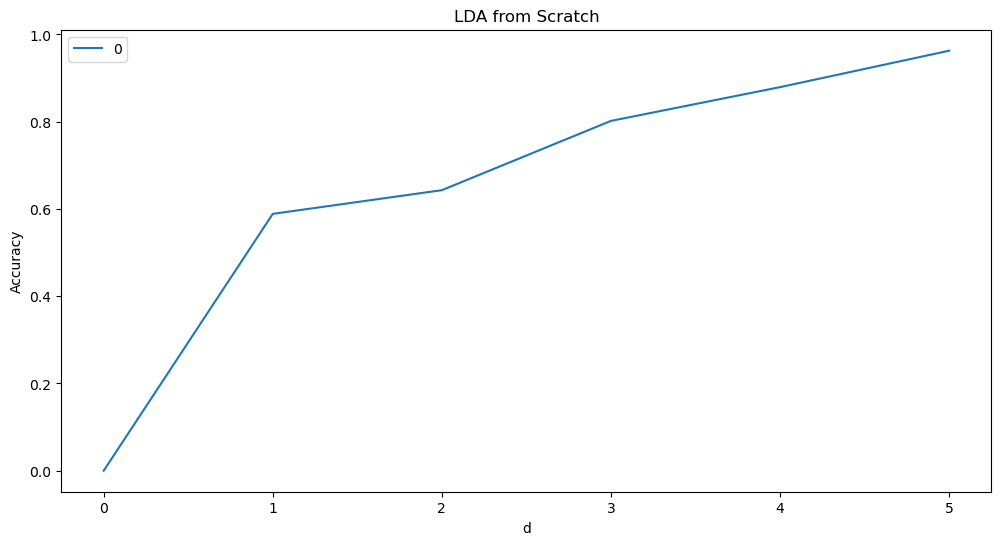

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(accuracies)
plt.title("LDA from Scratch")
plt.xlabel("d")
plt.ylabel("Accuracy")
plt.xticks([0,1,2,3,4,5])
# zero is just representational , i have not calculated for d = 0
plt.show()


### <font color='gold'> Task - 9 [Marks 2] </font>:
What is the value of d for which you obtained the best classification accuracy? How does this accuracy compare to the accuracy obtained on the original feature space?  - 1 mark


Show the classification report corresponding to the best value of d. - 1 mark

In [23]:
best_d = np.argmax(accuracies)

In [24]:
#Initialize and fit LDA
lda_scratch = LDAFromScratch(n_components=best_d)
lda_scratch.fit(X_scaled, y_train.values.reshape(-1))
X_lda_scratch = lda_scratch.transform(X_scaled)
X_test_lda_scratch = lda_scratch.transform(X_test_scaled)


In [25]:

# Initialize a linear SVM
svm_linear = SVC(kernel='rbf', random_state=42)

# Train the model
svm_linear.fit(X_lda_scratch.real, y_train)

# Predictions on the test set
y_pred = svm_linear.predict(X_test_lda_scratch.real)



/home/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# Evaluate the classifier
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.99      0.98       496
           2       0.97      0.98      0.97       471
           3       1.00      0.98      0.99       420
           4       0.95      0.88      0.91       491
           5       0.89      0.96      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
# our accuracy scores are very similar to sklearn

### <font color='gold'> Task - 10 [Marks 3] </font>:
Use sklearn’s implementation of LDA for the best values of d to project the data to the d-dimensional feature space, train the SVM classifier on this projected feature space and show the classification report and accuracy - 2 marks

How do the performance metrics compare with your from scratch implementation of LDA? - 1 mark

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize and fit LDA using scikit-learn
lda_sklearn = LinearDiscriminantAnalysis(n_components=best_d)
X_lda_sklearn = lda_sklearn.fit_transform(X_train, y_train)
X_test_lda_sklearn = lda_sklearn.transform(X_test)

/home/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:

# Initialize a linear SVM
svm_linear = SVC(kernel='rbf', random_state=42)

# Train the model
svm_linear.fit(X_lda_sklearn.real, y_train)

# Predictions on the test set
y_pred = svm_linear.predict(X_test_lda_sklearn.real)



/home/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.99      0.98       496
           2       0.97      0.98      0.97       471
           3       1.00      0.98      0.99       420
           4       0.95      0.88      0.92       491
           5       0.90      0.96      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.96      0.97      2947
weighted avg       0.97      0.97      0.96      2947



### <font color='gold'> Task - 11 [Marks 1] </font>:
For the value of d that gives the best classification accuracy, report the compression ratio achieved by LDA.  

In [31]:
print("Compression ratio", X_lda_sklearn.nbytes/X_train.nbytes)

Compression ratio 0.008912655971479501
